In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
from statsmodels.tsa.stattools import adfuller

In [4]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [5]:
import statsmodels.api as sm

In [6]:
import statsmodels.api as sm

In [7]:
import pmdarima

In [8]:
from pmdarima.arima import auto_arima

In [9]:
from matplotlib import pyplot as plt

In [10]:
df=pd.read_csv(r'airline_data_mult_wes - Python.csv')

In [11]:
df

,Date,Yt
0,01/01/1949,112
1,01/02/1949,118
2,01/03/1949,132
3,01/04/1949,129
4,01/05/1949,121
...,...,...
91,01/08/1956,405
92,01/09/1956,355
93,01/10/1956,306
94,01/11/1956,271


In [12]:
df=df.set_index("Date")

In [13]:
df["Log_Yt"]=np.log(df["Yt"])
df=df.drop(['Yt'], axis=1)

In [14]:
df

,Log_Yt
Date,
01/01/1949,4.718499
01/02/1949,4.770685
01/03/1949,4.882802
01/04/1949,4.859812
01/05/1949,4.795791
...,...
01/08/1956,6.003887
01/09/1956,5.872118
01/10/1956,5.723585


In [15]:
split=round(len(df)*0.75)
train=df.iloc[:split,:]
validation=df.iloc[split:,:]

<AxesSubplot:xlabel='Date'>

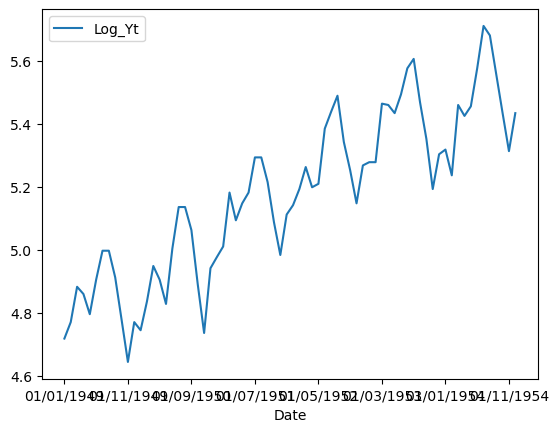

In [16]:
train.plot()

In [17]:
pmdarima.arima.nsdiffs(train['Log_Yt'],m=12)

1

<AxesSubplot:xlabel='Date'>

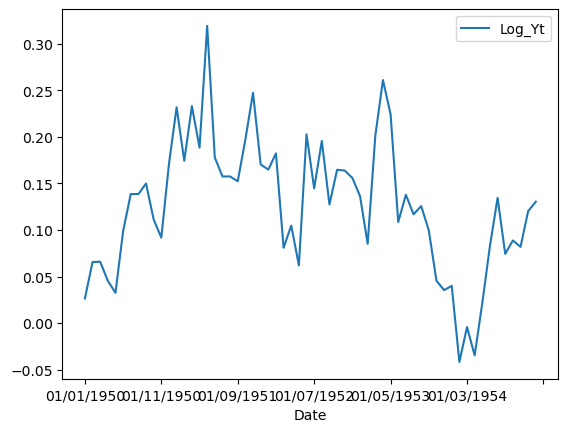

In [18]:
train_seasonal_diff=train.diff(12)
train_seasonal_diff=train_seasonal_diff.dropna()
train_seasonal_diff.plot()

In [19]:
pmdarima.arima.nsdiffs(train_seasonal_diff['Log_Yt'],m=12)

0

In [20]:
adfuller(train_seasonal_diff)

(-2.5543769318177025,
 0.10279792085361861,
 1,
 58,
 {'1%': -3.548493559596539,
  '5%': -2.912836594776334,
  '10%': -2.594129155766944},
 -139.45955820128336)

<AxesSubplot:xlabel='Date'>

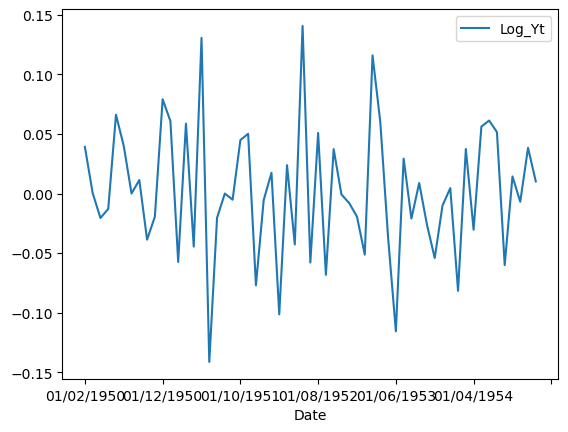

In [21]:
train_seasonal_diff_first_diff=train_seasonal_diff.diff(1)
train_seasonal_diff_first_diff=train_seasonal_diff_first_diff.dropna()
train_seasonal_diff_first_diff.plot()

In [22]:
adfuller(train_seasonal_diff_first_diff)

(-6.238481903861911,
 4.7608775894031216e-08,
 2,
 56,
 {'1%': -3.552928203580539,
  '5%': -2.9147306250000002,
  '10%': -2.595137155612245},
 -135.52327193616821)

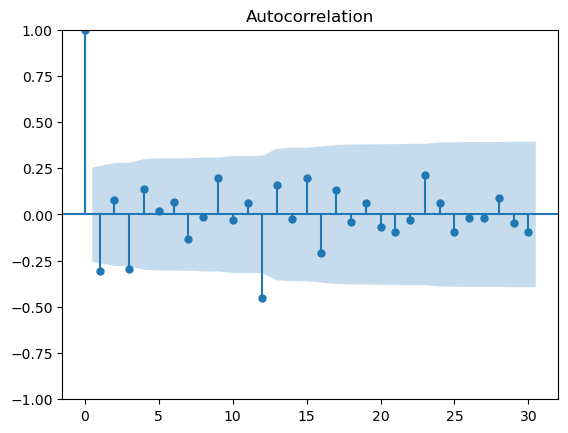

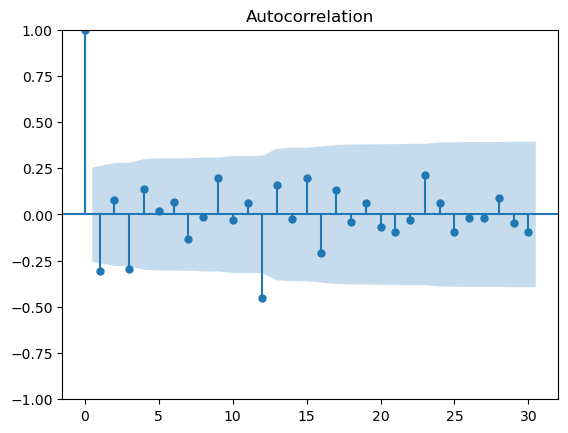

In [23]:
plot_acf(train_seasonal_diff_first_diff,lags=30)

C:\Users\ZarasAndreas\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


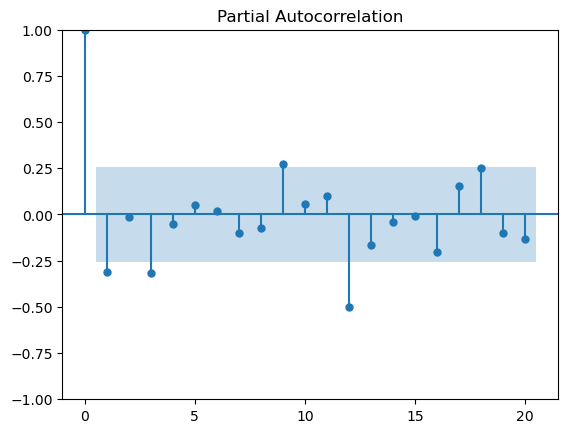

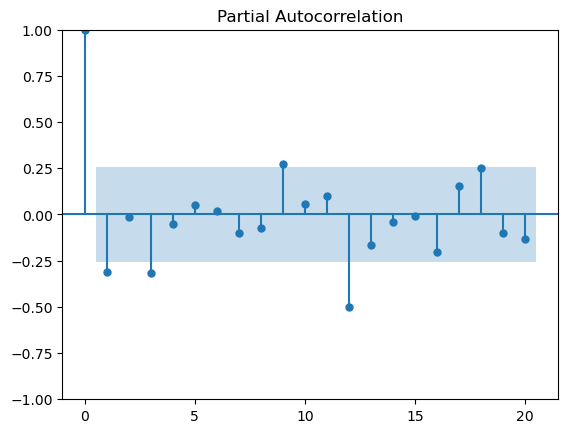

In [24]:
plot_pacf(train_seasonal_diff_first_diff,lags=20)

In [25]:
sarima = sm.tsa.statespace.SARIMAX(train,order=(1,1,1),seasonal_order=(1,1,1,12)).fit()

C:\Users\ZarasAndreas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ZarasAndreas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ZarasAndreas\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [26]:
sarima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                             Log_Yt   No. Observations:                   72
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                  99.406
Date:                            Wed, 04 Oct 2023   AIC                           -188.811
Time:                                    21:19:52   BIC                           -178.423
Sample:                                         0   HQIC                          -184.756
                                             - 72                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1924      0.350      0.549      0.583      -0.494       0.879
ma.L1         -0.5845      0.313     -1.869      0.062      -1.197       0.028
ar.S.L12      -0.2057      0.380     -0.542      0.588      -0.950       0.538
ma.S.L12      -0.4690      0.415     -1.131      0.258      -1.281       0.343
sigma2         0.0018      0.000      4.458      0.000       0.001       0.003
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 0.85
Prob(Q):                              0.90   Prob(JB):                         0.65
Heteroskedasticity (H):               1.05   Skew:                            -0.15
Prob(H) (two-sided):                  0.92   Kurtosis:                         3.50
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [27]:
train

,Log_Yt
Date,
01/01/1949,4.718499
01/02/1949,4.770685
01/03/1949,4.882802
01/04/1949,4.859812
01/05/1949,4.795791
...,...
01/08/1954,5.680173
01/09/1954,5.556828
01/10/1954,5.433722


In [28]:
auto_model = auto_arima(train,start_q=0,start_p=0,start_P=0,start_Q=0,m=12,information_criterion='aic')
auto_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                   72
Model:             SARIMAX(2, 0, 0)x(0, 1, [1], 12)   Log Likelihood                 103.004
Date:                              Wed, 04 Oct 2023   AIC                           -196.009
Time:                                      21:20:08   BIC                           -185.537
Sample:                                           0   HQIC                          -191.913
                                               - 72                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0298      0.021      1.435      0.151      -0.011       0.070
ar.L1          0.5430      0.145      3.739      0.000       0.258       0.828
ar.L2          0.2285      0.141      1.624      0.104      -0.047       0.504
ma.S.L12      -0.6982      0.242     -2.883      0.004      -1.173      -0.224
sigma2         0.0016      0.000      4.492      0.000       0.001       0.002
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.22
Prob(Q):                              0.97   Prob(JB):                         0.33
Heteroskedasticity (H):               0.93   Skew:                            -0.05
Prob(H) (two-sided):                  0.87   Kurtosis:                         3.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [29]:
forecasts, conf_int  = auto_model.predict(len(validation),return_conf_int=True,alpha=0.05)
conf_int_df=pd.DataFrame(conf_int)
conf_int_df.rename(columns = {0:'LFI',1:'UFI'}, inplace = True)
forecasts_df=pd.DataFrame(forecasts)
forecasts_df.rename(columns = {0:'Forecasts'}, inplace = True)
in_sample=auto_model.predict_in_sample()
in_sample=in_sample.reset_index(drop=True)
in_sample_df=pd.DataFrame(in_sample)
in_sample_df

C:\Users\ZarasAndreas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


,predicted_mean
0,0.130373
1,0.130373
2,0.130373
3,0.130373
4,0.130373
...,...
67,5.716594
68,5.585388
69,5.446222
70,5.310761


In [30]:
validation=validation.reset_index(drop=True)
validation
forecasts_df=forecasts_df.reset_index(drop=True)
validation
validation_forecasts_conf_int_df=pd.concat([validation,forecasts_df,conf_int_df],axis=1)
train=train.reset_index(drop=True)
train
in_sample_df
in_sample_train_df=pd.concat([in_sample_df,train],axis=1)
in_sample_train_df
final=pd.concat([in_sample_train_df,validation_forecasts_conf_int_df])
final=final.reset_index(drop=True)
final["Date"] = pd.date_range(start ='01/01/1949', freq ='MS', periods = 96)
final=final.set_index(final["Date"])
final=final.drop(['Date'], axis=1)
final
exp_final=final.apply(lambda x : np.exp(x))
exp_final

,predicted_mean,Log_Yt,Forecasts,LFI,UFI
Date,,,,,
1949-01-01,1.139253,112.0,NaN,NaN,NaN
1949-02-01,1.139253,118.0,NaN,NaN,NaN
1949-03-01,1.139253,132.0,NaN,NaN,NaN
1949-04-01,1.139253,129.0,NaN,NaN,NaN
1949-05-01,1.139253,121.0,NaN,NaN,NaN
...,...,...,...,...,...
1956-08-01,NaN,405.0,386.849493,342.176912,437.354261
1956-09-01,NaN,355.0,344.512771,304.702800,389.523987
1956-10-01,NaN,306.0,305.006049,269.748056,344.872512


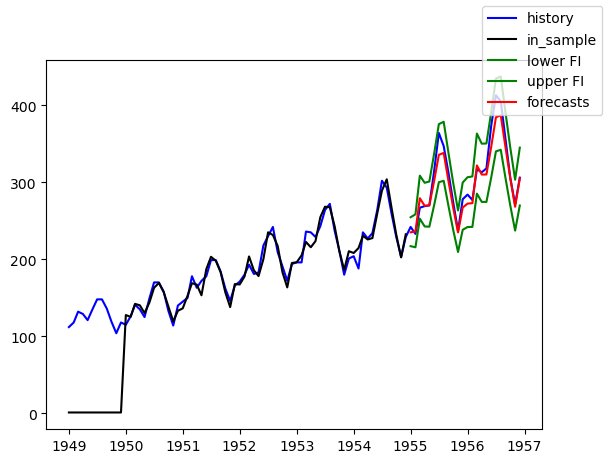

In [31]:
fig, ax = plt.subplots()
ax.plot(exp_final["Log_Yt"],color='blue',label='history')
ax.plot(exp_final["predicted_mean"],color='black',label='in_sample')
ax.plot(exp_final["LFI"],color='green',label='lower FI')
ax.plot(exp_final["UFI"],color='green',label='upper FI')
ax.plot(exp_final["Forecasts"],color='red',label='forecasts')
fig.legend()

In [32]:
import numpy as np
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    mae = np.mean(np.abs(forecast - actual))    # MAE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
               # ACF1
    return({'mape':mape, 'mae': mae,  'rmse':rmse})

In [33]:
forecast_accuracy(exp_final["Forecasts"],exp_final["Log_Yt"])

{'mape': 0.028387101823659888,
 'mae': 9.356939353938527,
 'rmse': 12.602921888915692}

In [34]:
sarimax = sm.tsa.statespace.SARIMAX(df,order=auto_model.order,seasonal_order=auto_model.seasonal_order).fit()
sarimax.summary()

C:\Users\ZarasAndreas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ZarasAndreas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                               Log_Yt   No. Observations:                   96
Model:             SARIMAX(2, 0, 0)x(0, 1, [1], 12)   Log Likelihood                 148.872
Date:                              Wed, 04 Oct 2023   AIC                           -289.744
Time:                                      21:20:09   BIC                           -280.020
Sample:                                           0   HQIC                          -285.835
                                               - 96                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6728      0.091      7.393      0.000       0.494       0.851
ar.L2          0.3212      0.093      3.468      0.001       0.140       0.503
ma.S.L12      -0.6100      0.129     -4.728      0.000      -0.863      -0.357
sigma2         0.0015      0.000      6.394      0.000       0.001       0.002
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 0.14
Prob(Q):                              0.90   Prob(JB):                         0.93
Heteroskedasticity (H):               0.36   Skew:                             0.03
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [35]:
pred = sarimax.get_forecast(steps = 24)
forecasts=pred.predicted_mean
ci=pred.conf_int()
forecasts_df=pd.DataFrame(forecasts)
ci_df=pd.DataFrame(ci)
predictions_df=pd.concat([forecasts_df,ci_df],axis=1)
predictions_df

C:\Users\ZarasAndreas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


,predicted_mean,lower Log_Yt,upper Log_Yt
96,5.753916,5.677099,5.830734
97,5.727468,5.634888,5.820048
98,5.875756,5.765742,5.985770
99,5.857223,5.733513,5.980933
100,5.864327,5.728054,6.000601
101,6.003253,5.855685,6.150821
102,6.114027,5.956031,6.272023
103,6.094605,5.926925,6.262286
104,5.971579,5.794823,6.148336
105,5.836358,5.651046,6.021669


In [36]:
predictions_df=predictions_df.apply(lambda x : np.exp(x))

In [37]:
df=df.apply(lambda x : np.exp(x))
final=pd.concat([df,predictions_df],axis=1)
final=final.reset_index(drop=True)
final["Date"] = pd.date_range(start ='01/01/1949', freq ='MS', periods = 120)
final=final.set_index(final["Date"])
final=final.drop(['Date'], axis=1)
final

,Log_Yt,predicted_mean,lower Log_Yt,upper Log_Yt
Date,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,NaN,NaN,NaN
1949-03-01,132.0,NaN,NaN,NaN
1949-04-01,129.0,NaN,NaN,NaN
1949-05-01,121.0,NaN,NaN,NaN
...,...,...,...,...
1958-08-01,NaN,492.838308,366.368052,662.966096
1958-09-01,NaN,435.576949,320.813314,591.394653
1958-10-01,NaN,380.303149,277.616715,520.971818


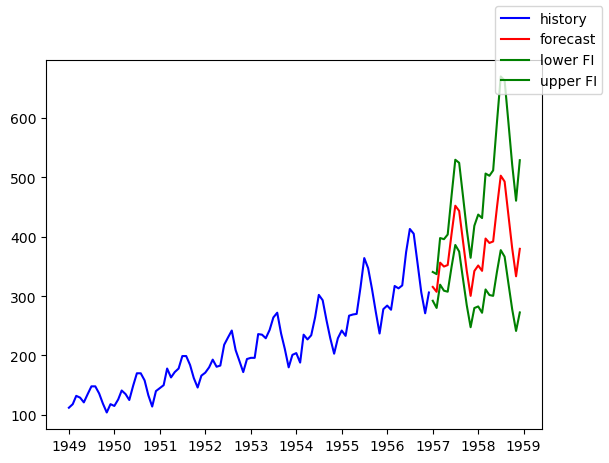

In [38]:
fig, ax = plt.subplots()
ax.plot(final["Log_Yt"],color='blue',label='history')
ax.plot(final["predicted_mean"],color='red',label='forecast')
ax.plot(final["lower Log_Yt"],color='green',label='lower FI')
ax.plot(final["upper Log_Yt"],color='green',label='upper FI')
fig.legend()